In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling

In [2]:
test = pd.read_csv('./data/test.csv')
train = pd.read_csv('./data/train.csv')

## Concatenating test and train data... we don't do any ML just yet

In [3]:
frames = [test, train]
df = pd.concat(frames)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Resetting index
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


# Data Inspection & cleaning

In [4]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

### Check for missing values

In [5]:
df.count()

id                                   129880
Gender                               129880
Customer Type                        129880
Age                                  129880
Type of Travel                       129880
Class                                129880
Flight Distance                      129880
Inflight wifi service                129880
Departure/Arrival time convenient    129880
Ease of Online booking               129880
Gate location                        129880
Food and drink                       129880
Online boarding                      129880
Seat comfort                         129880
Inflight entertainment               129880
On-board service                     129880
Leg room service                     129880
Baggage handling                     129880
Checkin service                      129880
Inflight service                     129880
Cleanliness                          129880
Departure Delay in Minutes           129880
Arrival Delay in Minutes        

Some rows were found, where 'Arrival Delay in Minutes' is nan, which ones are they?

In [6]:
df[df['Arrival Delay in Minutes'].isna()].head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,107365,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,1,...,2,4,2,5,4,5,2,9,NaN,neutral or dissatisfied
656,108648,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,2,...,4,2,5,2,5,2,4,51,NaN,neutral or dissatisfied
1071,16797,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,4,...,5,2,5,2,3,2,5,126,NaN,neutral or dissatisfied
1224,30090,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,4,...,4,4,3,1,1,4,4,0,NaN,neutral or dissatisfied
1589,41924,Female,Loyal Customer,58,Business travel,Eco,129,5,3,3,...,5,5,5,5,3,5,5,3,NaN,satisfied


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba4839c130>,
      dtype=object)

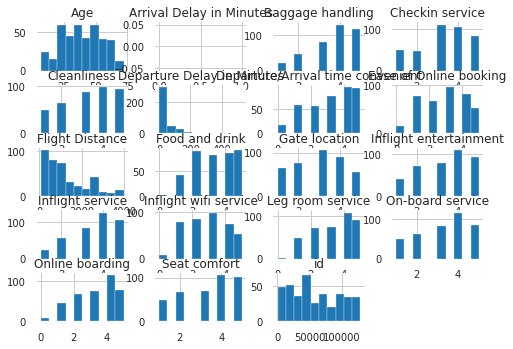

In [7]:
df[df['Arrival Delay in Minutes'].isna()].hist()

No siginificant pattern can be observed as to why these values are NaN in the 'Arrival Delay in Minutes' column. So lets drop them, since they're only 339 out of 129880

In [8]:
df = df[~df['Arrival Delay in Minutes'].isna()]

### Searching for duplicates

In [9]:
df[df.duplicated(keep=False)]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


### Transforming categorical variables to dummies

In [10]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df = pd.get_dummies(df, columns=['Type of Travel'], drop_first=True)
df = pd.get_dummies(df, columns=['Customer Type'], drop_first=True)
df = pd.get_dummies(df, columns=['satisfaction'], drop_first=True)
#df = pd.get_dummies(df, columns=['Class'])

# Mapping the class to values 0, 1, 2.
df['Class'] = df.Class.map({'Eco':0,
                            'Eco Plus':1,
                            'Business':2,
                           }
                          )


In [11]:
df = df.rename(columns={'Gender_Male':'Is Gender Male',
                        'Type of Travel_Personal Travel':'Is Travel Type Personal',
                        'Customer Type_disloyal Customer':'Is Customer Disloyal',
                        #'Class_Eco':'Is Class Eco',
                        #'Class_Eco_Plus':'Is Class Eco Plus',
                        #'Class_Business':'Is Class Business',
                        'satisfaction_satisfied':'Is satisfied',
                        #'Class_Eco Plus': 'Is Class Eco Plus',
                       },
              )

In [12]:
df.head()

,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Is Gender Male,Is Travel Type Personal,Is Customer Disloyal,Is satisfied
0,19556,52,0,160,5,4,3,4,3,4,...,5,2,5,5,50,44.0,0,0,0,1
1,90035,36,2,2863,1,1,3,1,5,4,...,4,3,4,5,0,0.0,0,0,0,1
2,12360,20,0,192,2,0,2,4,2,2,...,3,2,2,2,0,0.0,1,0,1,0
3,77959,44,2,3377,0,0,0,2,3,4,...,1,3,1,4,0,6.0,1,0,0,1
4,36875,49,0,1182,2,3,4,3,4,1,...,2,4,2,4,0,20.0,0,0,0,1


# Checking for correlation

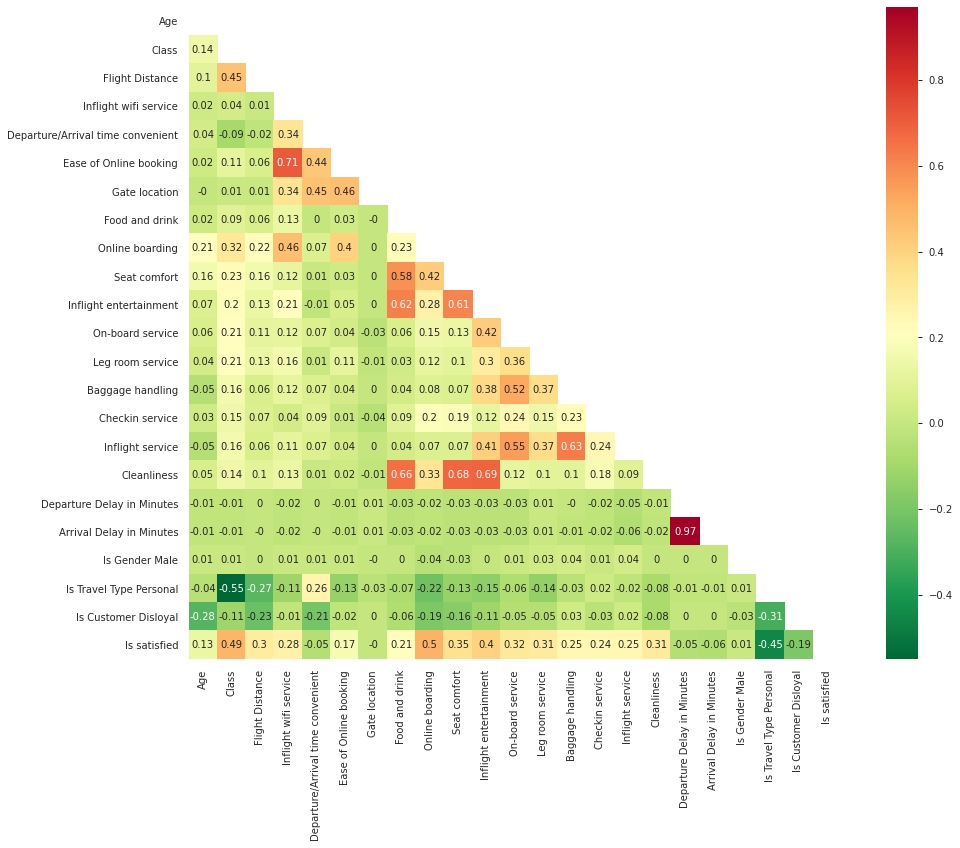

In [13]:
df_corr = df.drop('id',axis=1).corr()

# Creating mask to focus only on one part of the matrix
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 12))
    ax = sns.heatmap(round(df_corr,2),
                     mask=mask,
                     square=True,
                     cmap='RdYlGn_r',
                     annot=True,
                    )

In [ ]:
## TODO : Plot a selection of the most interesting correlations let's say 0.3 < |corr()|

#df_corr = df_corr[df_corr > 0.3]

## Creating mask to focus only on one part of the matrix
#mask = np.zeros_like(df_corr)
#mask[np.triu_indices_from(mask)] = True

#with sns.axes_style("white"):
#    f, ax = plt.subplots(figsize=(16, 12))
#    ax = sns.heatmap(round(df_corr,2),
#                     mask=mask,
#                     square=True,
#                     cmap='RdYlGn_r',
#                     annot=True,
#                    )

In [15]:
df.head()

,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Is Gender Male,Is Travel Type Personal,Is Customer Disloyal,Is satisfied
0,19556,52,0,160,5,4,3,4,3,4,...,5,2,5,5,50,44.0,0,0,0,1
1,90035,36,2,2863,1,1,3,1,5,4,...,4,3,4,5,0,0.0,0,0,0,1
2,12360,20,0,192,2,0,2,4,2,2,...,3,2,2,2,0,0.0,1,0,1,0
3,77959,44,2,3377,0,0,0,2,3,4,...,1,3,1,4,0,6.0,1,0,0,1
4,36875,49,0,1182,2,3,4,3,4,1,...,2,4,2,4,0,20.0,0,0,0,1


In [21]:
df_piv = df.drop(['id',
                  'Flight Distance',
                  'Departure Delay in Minutes',
                  'Arrival Delay in Minutes',
                  'Age',
                  'Is Travel Type Personal',
                  'Is Customer Disloyal',
                  'Is satisfied',
                  'Class',
                  ],
                 axis=1,
                )

data=pd.melt(df_piv, id_vars=['Is Gender Male'])

In [17]:
df_rating_count = data.groupby(['variable', 'value']).agg({'value':'count'})
df_rating_count = df_rating_count.reset_index(level=0).rename(columns={'value':'count'}).reset_index(level=0)

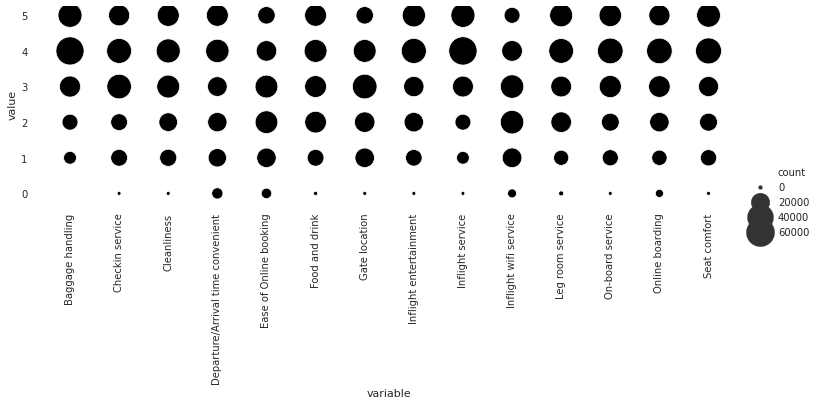

In [31]:
g = sns.relplot(x="variable",
            y="value",
            size="count",
            sizes=(15, 800),
            data=df_rating_count,
            color='black',
            height=3.5,
            aspect=3,
           )
g.set_xticklabels(rotation=90)

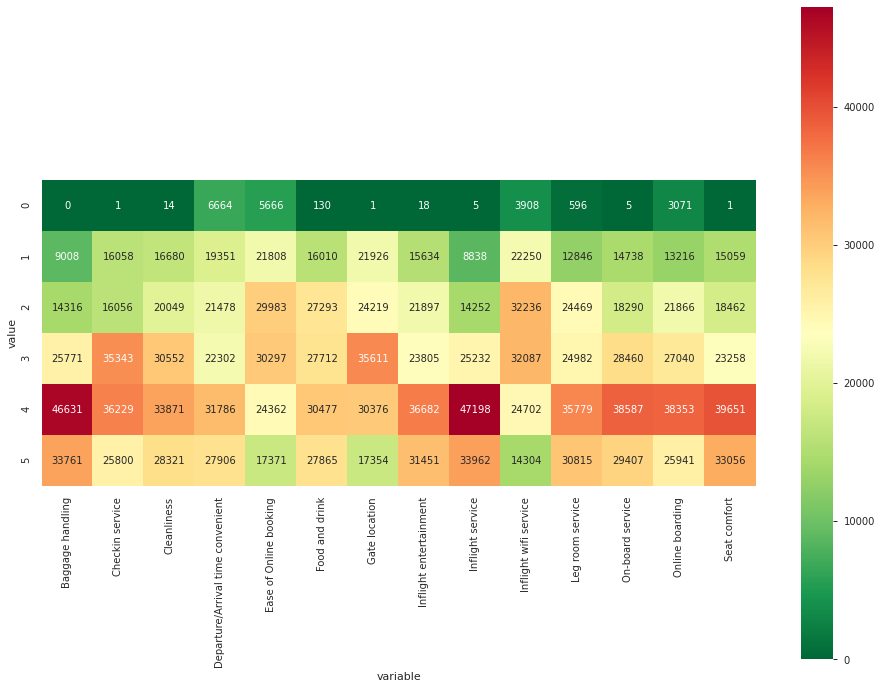

In [50]:
df_rating_pvt = df_rating_count.pivot(values='count', columns='variable', index='value').fillna(0).astype(int)

f, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(df_rating_pvt,
                 square=True,
                 cmap='RdYlGn_r',
                 annot=True,
                 fmt='d',
                    )


In [51]:

df.head()

,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Is Gender Male,Is Travel Type Personal,Is Customer Disloyal,Is satisfied
0,19556,52,0,160,5,4,3,4,3,4,...,5,2,5,5,50,44.0,0,0,0,1
1,90035,36,2,2863,1,1,3,1,5,4,...,4,3,4,5,0,0.0,0,0,0,1
2,12360,20,0,192,2,0,2,4,2,2,...,3,2,2,2,0,0.0,1,0,1,0
3,77959,44,2,3377,0,0,0,2,3,4,...,1,3,1,4,0,6.0,1,0,0,1
4,36875,49,0,1182,2,3,4,3,4,1,...,2,4,2,4,0,20.0,0,0,0,1


In [72]:
df_piv_1 = df.drop([x for x in df.columns.to_list() if not x in ['Flight Distance', 'Age','Is satisfied']], axis=1)
#data=pd.melt(df_piv_1, id_vars=['Is Gender Male'])
#df.columns.to_list()
df_piv_1['Not satisfied'] = np.where(df_piv_1['Is satisfied'] == 1, 0, 1)
df_piv_1 = df_piv_1.groupby(['Age', 'Flight Distance']).agg({'Is satisfied':sum, 'Not satisfied':sum,})
df_piv_count = df_piv_1.reset_index(level=0).reset_index(level=0)
df_piv_count['Satisfied ratio'] = np.where(df_piv_count['Is satisfied'] + df_piv_count['Not satisfied'] !=0,
                                          df_piv_count['Is satisfied']/(df_piv_count['Is satisfied'] + df_piv_count['Not satisfied']),
                                          np.nan,
                                          )

In [77]:
df_piv_count

,Flight Distance,Age,Is satisfied,Not satisfied,Satisfied ratio
0,67,7,0,3,0.0
1,73,7,0,1,0.0
2,77,7,0,2,0.0
3,82,7,0,1,0.0
4,86,7,0,4,0.0
...,...,...,...,...,...
65599,1904,85,0,1,0.0
65600,2078,85,1,0,1.0
65601,2971,85,1,0,1.0
65602,3156,85,0,1,0.0


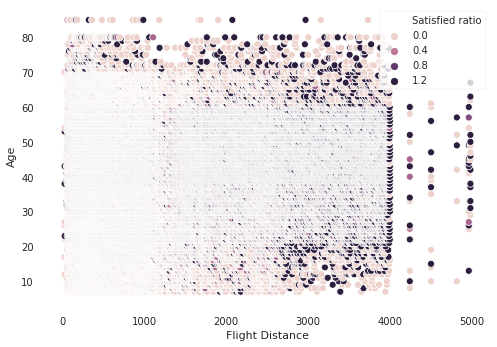

In [85]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Flight Distance", y="Age",
                     #hue="year",
                     hue="Satisfied ratio",
                     cmap='coolwarm',
                     #sizes=(10, 100),
                     data=df_piv_count)

# What is the nature of the positive correlation between 'In Flight WiFi Service' and 'Ease of Online Booking'?

# Do passengers rate their experiences differently depending on which class they fly?

# Which variables contribute most to 'is satisfied'?

that is, where would you start improving first as an airline, if you had e.g. limited ressources (time, money)?

Let's try a linear regression, with the passenger **satisfaction** being the **dependent variable**, and let be the following variables be the independent variables:

* 'Age'
* 'Class'
* 'Flight Distance'
* 'Inflight wifi service'
* 'Departure/Arrival time convenient'
* 'Ease of Online booking'
* 'Gate location'
* 'Food and drink'
* 'Online boarding'
* 'Seat comfort'
* 'Inflight entertainment'
* 'On-board service'
* 'Leg room service'
* 'Baggage handling'
* 'Checkin service'
* 'Inflight service'
* 'Cleanliness'
* 'Departure Delay in Minutes'
* 'Arrival Delay in Minutes'
* 'Is Gender Male'
* 'Is Travel Type Personal'
* 'Is Customer Disloyal'
* 'Is satisfied']

In [ ]:
df.columns